In [1]:
# This notebook runs a test code
import numpy as np
import matplotlib.pyplot as plt
import random 

from scipy import interpolate

# load in custom library
import lunar_processes as pr

# for testing time
import time

In [3]:
# Establish run parameters
# Initial longitude of noon
local_noon = 0

# Run time in lunar hours
t = 24

# Size of time step in lunar hours
dt = 0.25 

# Number of particles
n = 100

# establish particles
## establish weights
weight_cos = np.linspace(-np.pi/2, np.pi/2, 180)
weight_lon = np.sin(np.linspace(0, 2*np.pi, 360)-np.pi/2)
mask = weight_lon < 0
weight_lon[mask] = 0

particles = np.zeros((n, 3)) # latitude, longitude,  tod
particles[:, 0] = np.deg2rad(random.choices(range(-90, 90), weights=np.cos(weight_cos), k=n)) # latitude in degrees
particles[:, 1] = np.deg2rad(random.choices(range(0, 360), weights=weight_lon, k=n)) # longitude in degrees
particles[:, 2] = (12+(((np.rad2deg(particles[:, 1]-local_noon))*24)/360))%24 # tod, based on where local noon is

# run
results = np.zeros((n, 8, int(t/dt)))

# start timer
st = time.time()

# Run model for n particles, 1 lunar day time step 1/2 hr (lunar)
for i in range(0, n, 1):
    results[i, :, :] = pr.Model_MonteCarlo(particles[i, :], dt, t, local_noon)
    if i % 10 ==0:
            print('particle', i)

print('Total simulation time: %2.1f'%(time.time() - st))

print('Lunar time step: %3.2e'%(pr.sec_per_hour_M*dt))

particle 0


/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:206: RuntimeWarning: invalid value encountered in sqrt
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax
/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:206: RuntimeWarning: invalid value encountered in arcsin
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax


particle 10
lacking tod data, expanding search
particle 20
particle 30
particle 40
lacking tod data, expanding search
particle 50
particle 60
lacking tod data, expanding search
particle 70
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
particle 80
particle 90
Total simulation time: 4296.6
Lunar time step: 2.66e+04


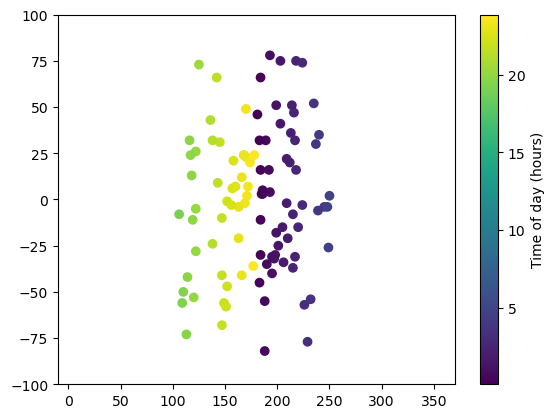

In [4]:
# check distribution
plt.scatter(np.rad2deg(particles[:, 1]), np.rad2deg(particles[:, 0]), c=particles[:, 2])
plt.ylim((-100, 100))
plt.xlim((-10, 370))
plt.colorbar(label='Time of day (hours)')
plt.show()

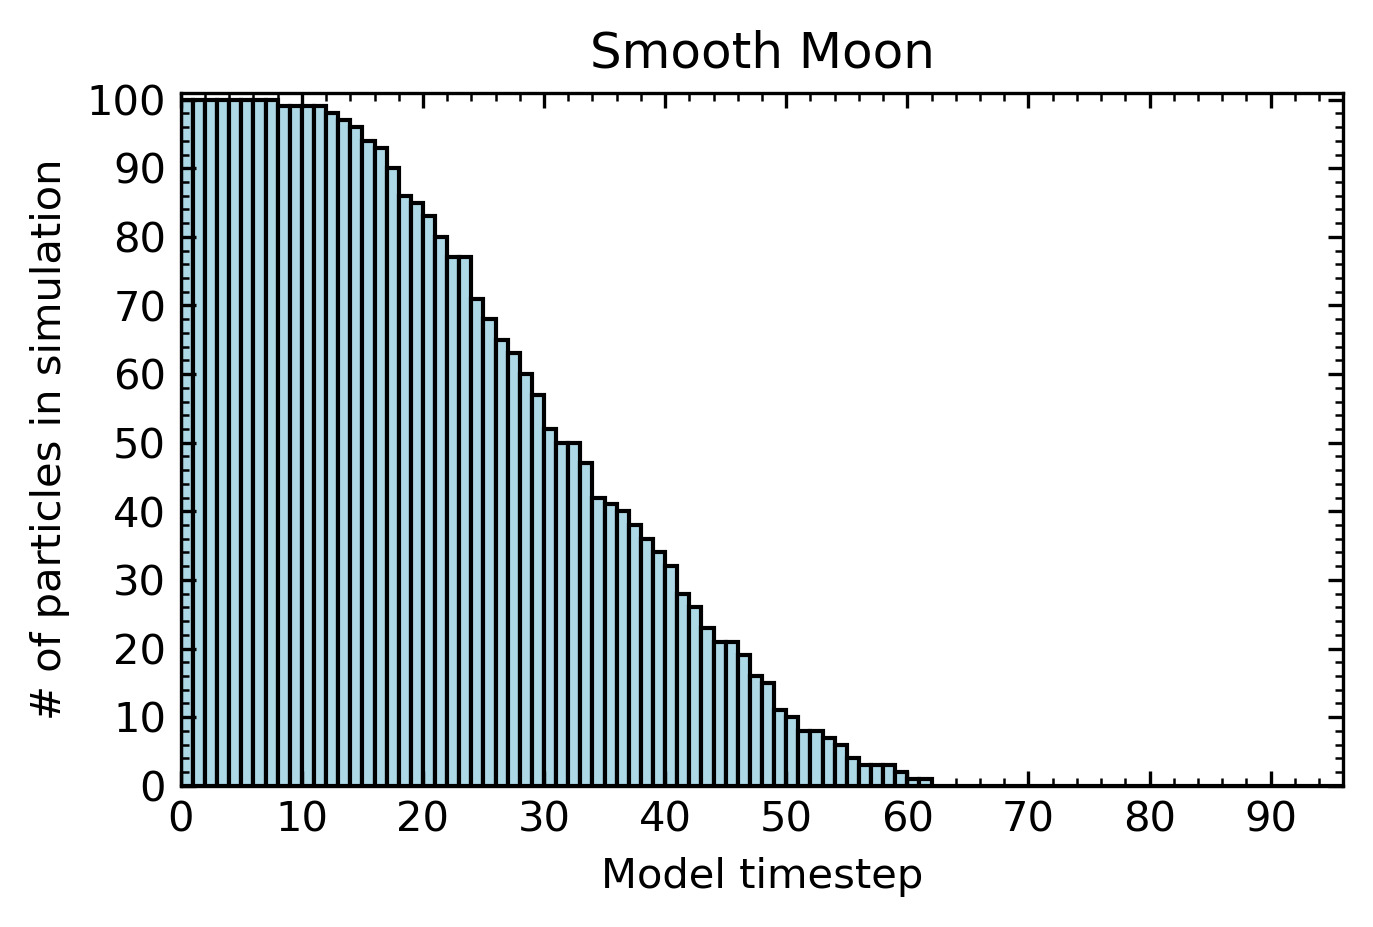

In [10]:
# survival percent through time
smoothmoon = results
masks = ~np.isnan(smoothmoon[:, 4, :])
S, edgess = np.histogram(smoothmoon[:, 4, :][masks], bins=2, range=(-1, 1))
edges = np.array(edgess)[1:]

plt.figure(figsize=(5, 3), dpi= 300)
timestep = 96
for t in range(timestep):
    masks = ~np.isnan(smoothmoon[:, 4, t])
    S, edges = np.histogram(smoothmoon[:, 4, t][masks], bins=2, range=(-1, 1))
    plt.bar(t+0.5, S[1], width=1, edgecolor='k', facecolor='lightblue')

plt.yticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 2), minor=True)
plt.ylim((0, 101))

plt.xticks(np.arange(0, 96, 10))
plt.xticks(np.arange(0, 96, 2), minor=True)
plt.xlim((0, 96))
plt.xlabel('Model timestep')
plt.ylabel('# of particles in simulation')
plt.title('Smooth Moon')

plt.tick_params(which='both', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True, direction='in')
plt.show()

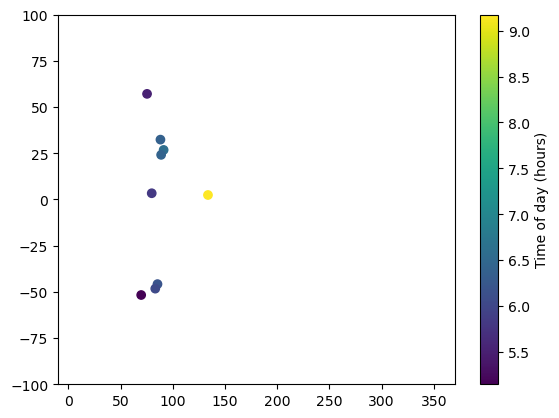

In [12]:
tt = 50
plt.scatter(np.rad2deg(results[:, 1, tt]), np.rad2deg(results[:, 0, tt]), c=results[:, 2, tt])
plt.ylim((-100, 100))
plt.xlim((-10, 370))
plt.colorbar(label='Time of day (hours)')
plt.show()

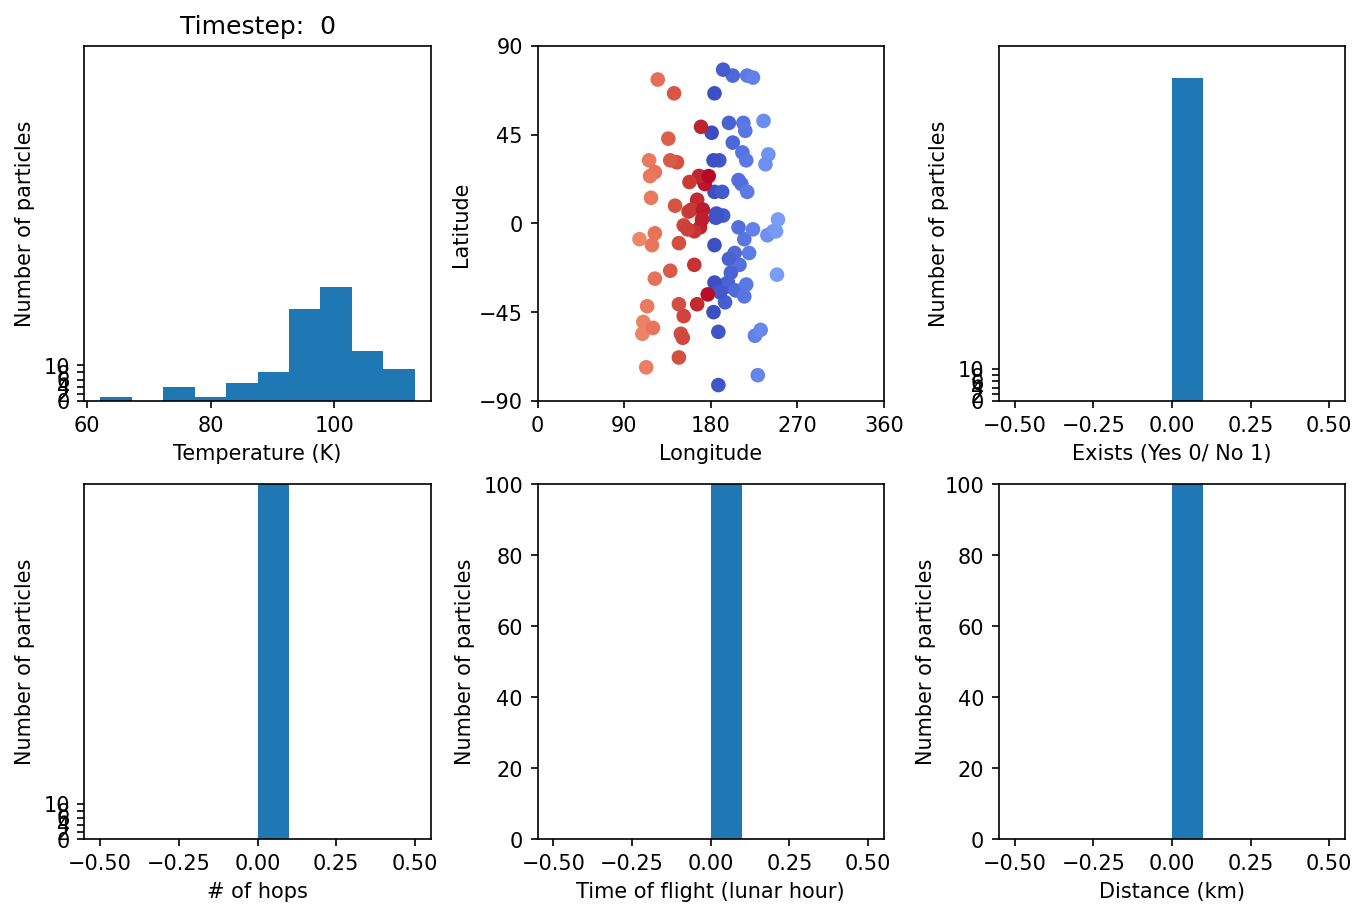

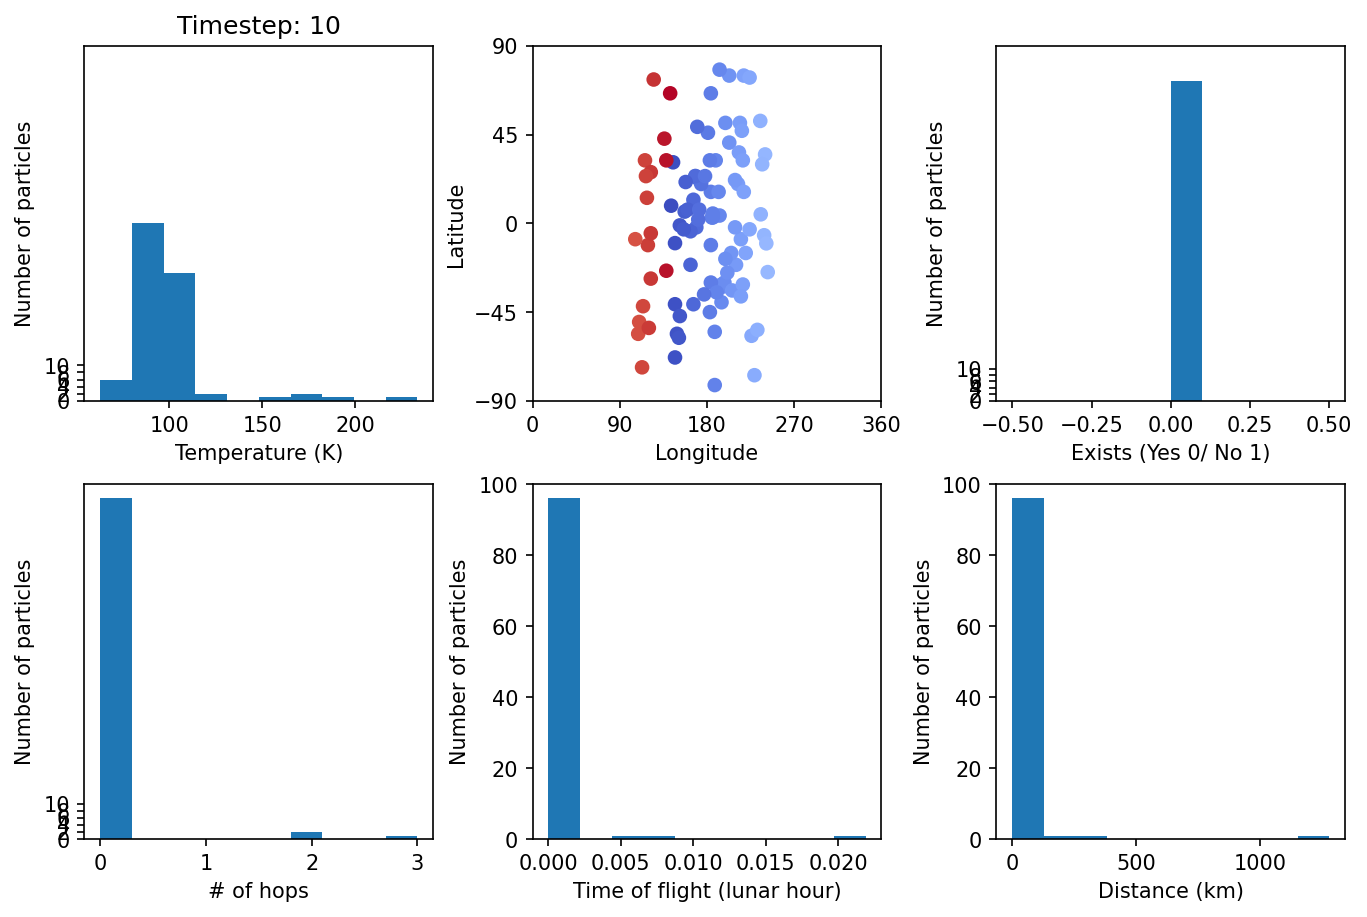

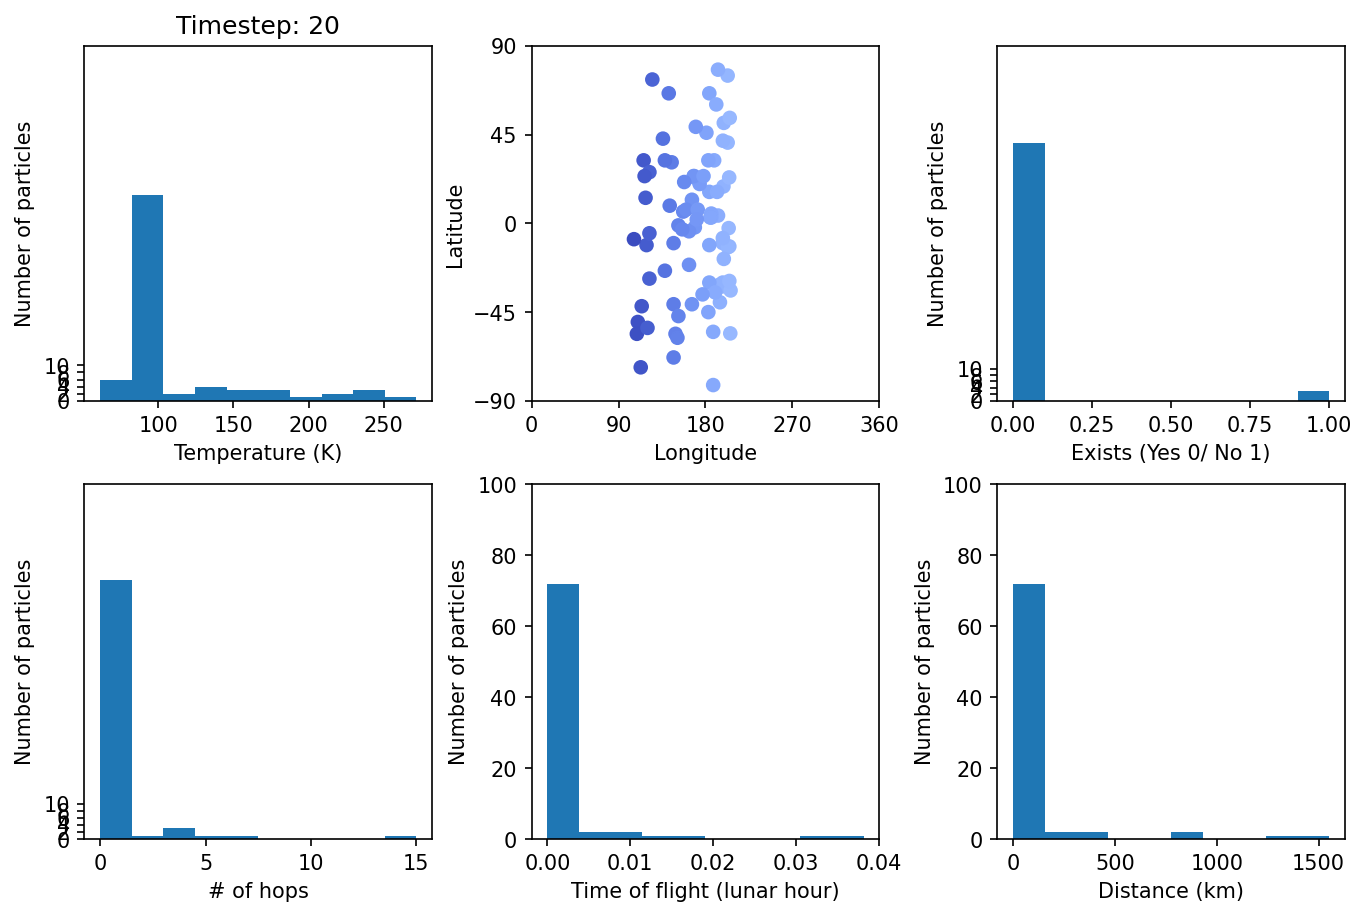

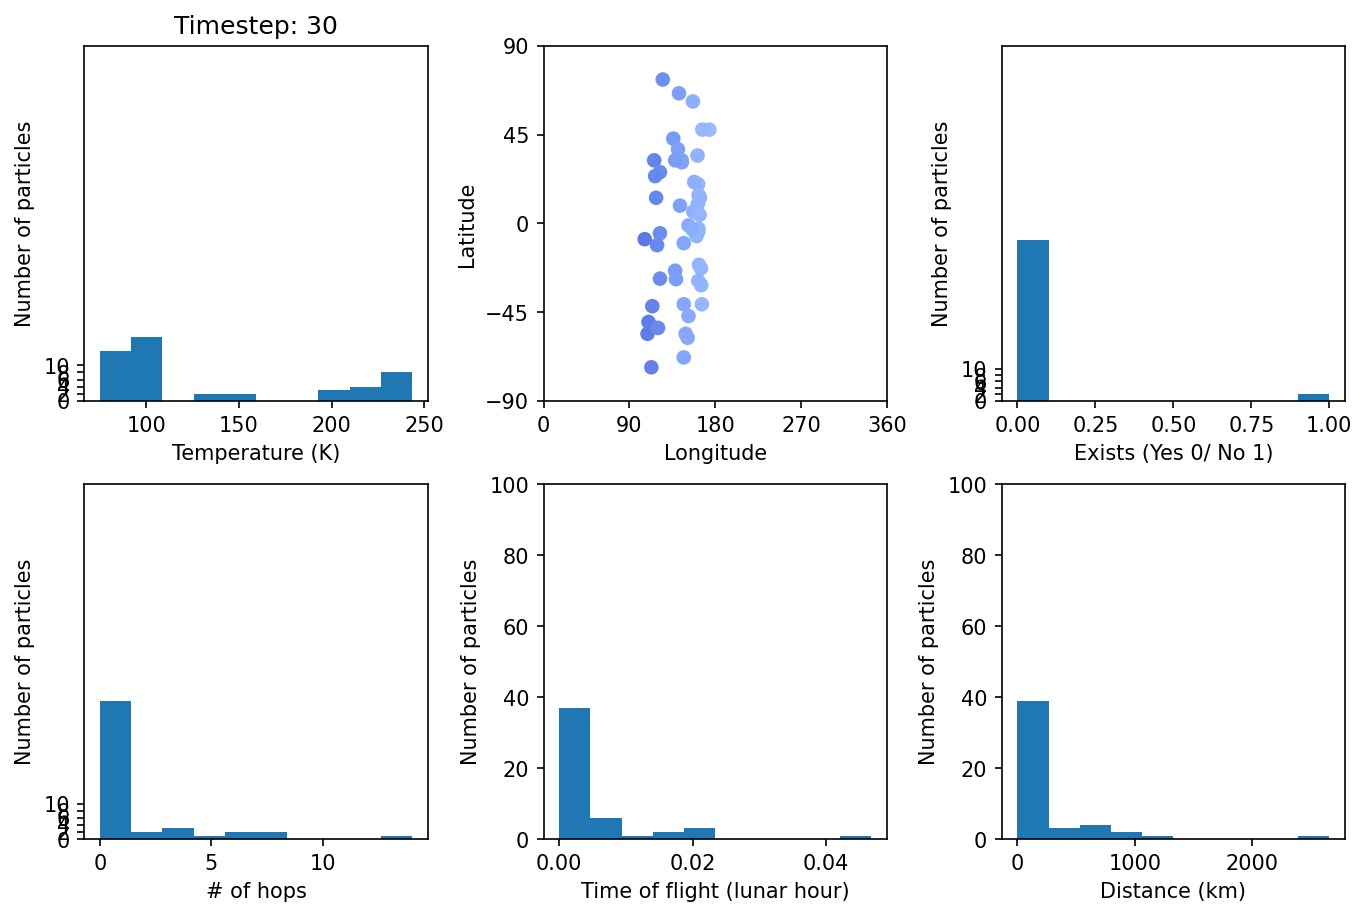

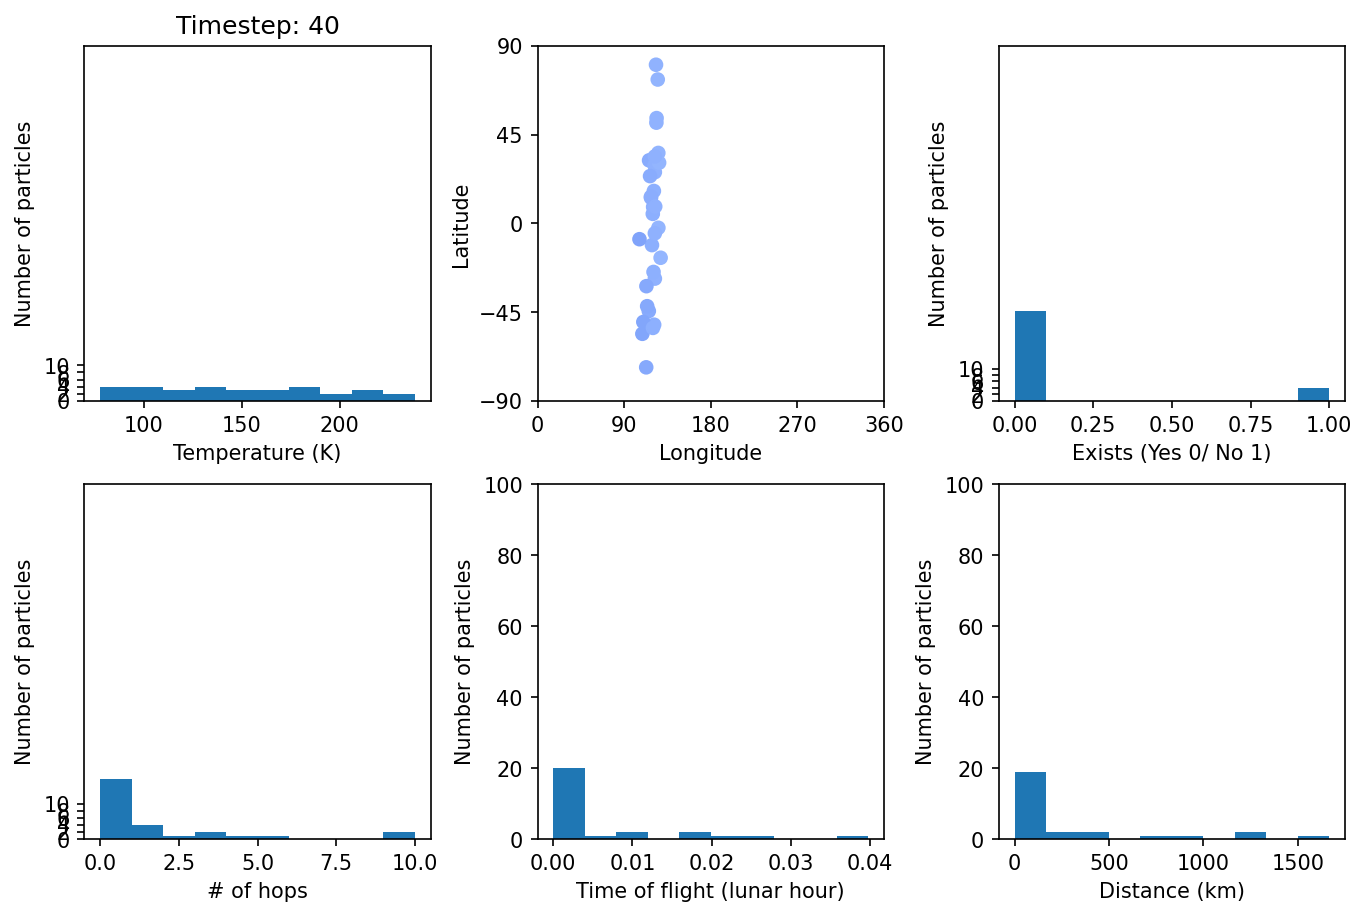

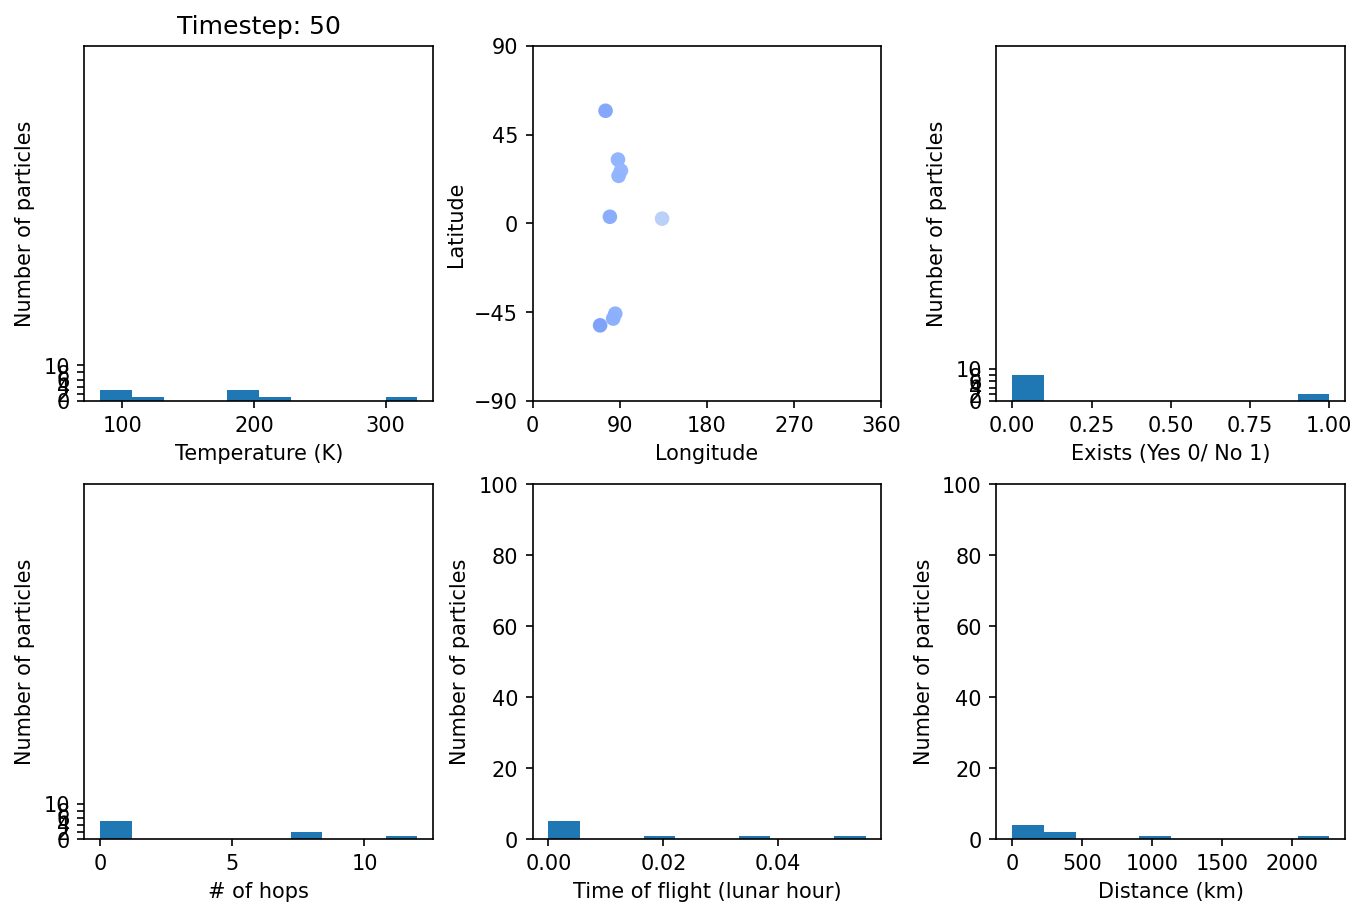

In [15]:

for i in range(0, 60, 10):
    fig = plt.figure(figsize=(9, 6), dpi=150, constrained_layout=True)
    #plt.title('Timestep: %2.0f'%i)

    axs = fig.subplot_mosaic(
    [
        ["hist", "image", "exists"], 
        ["hops", "time", "dist"]
    ])
    
    axs["hist"].hist(results[:, 3, i])
    axs["hist"].set_ylabel('Number of particles')
    axs["hist"].set_xlabel('Temperature (K)')
    axs["hist"].set_ylim((0, 100))
    axs["hist"].set_yticks([0, 2, 4, 6, 8, 10])
    axs["hist"].set_title('Timestep: %2.0f'%i)

    axs["image"].scatter(np.rad2deg(results[:, 1, i]), np.rad2deg(results[:, 0, i]), c=results[:, 2, i], cmap='coolwarm', vmin=0, vmax= 24)
    axs["image"].set_ylabel('Latitude')
    axs["image"].set_xlabel('Longitude')
    axs["image"].set_ylim((-90, 90))
    axs["image"].set_xlim((0, 360))
    axs["image"].set_yticks([-90, -45, 0, 45, 90])
    axs["image"].set_xticks([0, 90, 180, 270, 360])

    axs["exists"].hist(results[:, 4, i])
    axs["exists"].set_ylabel('Number of particles')
    axs["exists"].set_xlabel('Exists (Yes 0/ No 1)')
    axs["exists"].set_ylim((0, 110))
    axs["exists"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["hops"].hist(results[:, 6, i])
    axs["hops"].set_ylabel('Number of particles')
    axs["hops"].set_xlabel('# of hops')
    axs["hops"].set_ylim((0, 100))
    axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["time"].hist(results[:, 5, i]/pr.sec_per_hour_M)
    axs["time"].set_ylabel('Number of particles')
    axs["time"].set_xlabel('Time of flight (lunar hour)')
    axs["time"].set_ylim((0, 100))
    #axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["dist"].hist(results[:, 7, i]/1000)
    axs["dist"].set_ylabel('Number of particles')
    axs["dist"].set_xlabel('Distance (km)')
    axs["dist"].set_ylim((0, 100))
    #axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    
    
    #axs["image"].colorbar()
    
    
    
    
    